In [11]:
#!/usr/bin/env python
# coding: utf-8

## Importamos librerias

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Leemos los datasets

In [13]:
test_df = pd.read_csv("../test_kaggle.csv")
train_df = pd.read_csv("..train.kaggle.csv")

In [14]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
test_df

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S
1,1,893,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
2,2,894,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.0000,NaN,S
3,3,895,2,"Andrew, Mr. Frank Thomas",male,25.0,0,0,C.A. 34050,10.5000,NaN,S
4,4,896,2,"Angle, Mr. William A",male,34.0,1,0,226875,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
204,204,1096,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C
205,205,1097,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
206,206,1098,2,"Wright, Miss. Marion",female,26.0,0,0,220844,13.5000,NaN,S
207,207,1099,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C


In [16]:
#Imprimimos la informacion de ambos datasets

train_df.info()
print('------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   209 non-null    in

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#Obtenemos numero de filas y columnas

train_df.shape, test_df.shape

((891, 12), (209, 12))

In [19]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Visualizacion y Preprocesamiento de datos

In [21]:
survived = train_df.Survived.value_counts(normalize=True) * 100
print(f'Survival rate {survived[1]:.2f}%')

Survival rate 38.38%


In [22]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [23]:
train_df.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [24]:
#Imprimimos la correlacion del train dataset

train_df.corr().T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


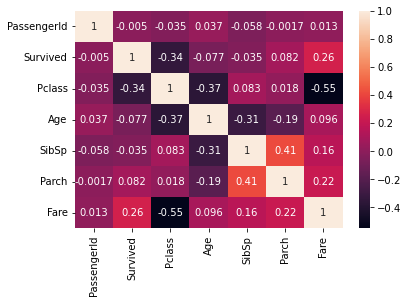

In [25]:
#Creamos un mapa de calor para ver mas visualmente las correlaciones unicamente se veran las variables numericas

corr = train_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

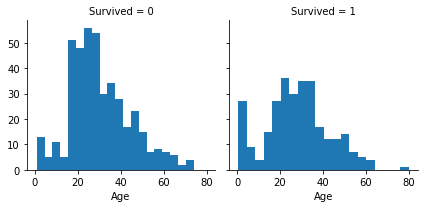

In [26]:
#Mostramos 2 histogramas para los que sobrevivieron y los que no con la Edad

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [27]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [28]:
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('After', (891, 10), (209, 10), (891, 10), (209, 10))

In [29]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [30]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In[19]:

In [31]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [32]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [34]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (209, 10))

In [35]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [36]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [37]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [38]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [39]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [40]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [41]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [42]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,S,1,2,0
1,1,1,1,38.0,1,0,71.2833,C,3,2,0
2,1,3,1,26.0,0,0,7.9250,S,2,1,1
3,1,1,1,35.0,1,0,53.1000,S,3,2,0
4,0,3,0,35.0,0,0,8.0500,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5,1,1
887,1,1,1,19.0,0,0,30.0000,S,2,1,1
888,0,3,1,NaN,1,2,23.4500,S,2,4,0
889,1,1,0,26.0,0,0,30.0000,C,1,1,1


In [43]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,S,1,0
1,1,1,1,38.0,71.2833,C,3,0
2,1,3,1,26.0,7.9250,S,2,1
3,1,1,1,35.0,53.1000,S,3,0
4,0,3,0,35.0,8.0500,S,1,1


In [45]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [46]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [47]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [48]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,0,1,0
1,1,1,1,38.0,71.2833,1,3,0
2,1,3,1,26.0,7.9250,0,2,1
3,1,1,1,35.0,53.1000,0,3,0
4,0,3,0,35.0,8.0500,0,1,1


In [49]:
test_df.head(10)

,Unnamed: 0,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,892,3,0,25.0,7.6500,0,1,1
1,1,893,3,1,18.0,7.2292,1,3,1
2,2,894,2,0,30.0,13.0000,0,1,1
3,3,895,2,0,25.0,10.5000,0,1,1
4,4,896,2,0,34.0,26.0000,0,1,0
5,5,897,3,0,13.0,31.3875,0,4,0
6,6,898,3,0,40.0,31.3875,0,1,0
7,7,899,3,1,45.0,7.2250,1,3,1
8,8,900,3,0,21.0,7.2250,1,1,1
9,9,901,1,0,47.0,227.5250,1,5,0


In [50]:
train_df.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
Survived,1.000000,-0.338481,0.543351,-0.077221,0.257307,0.106811,0.407753,-0.203367
Pclass,-0.338481,1.000000,-0.131900,-0.369226,-0.549500,0.045702,-0.173929,0.135207
Sex,0.543351,-0.131900,1.000000,-0.093254,0.182333,0.116569,0.502713,-0.303646
Age,-0.077221,-0.369226,-0.093254,1.000000,0.096067,0.010171,-0.104766,0.198270
Fare,0.257307,-0.549500,0.182333,0.096067,1.000000,0.062142,0.136310,-0.271832
Embarked,0.106811,0.045702,0.116569,0.010171,0.062142,1.000000,0.045400,0.017807
Title,0.407753,-0.173929,0.502713,-0.104766,0.136310,0.045400,1.000000,-0.405813
IsAlone,-0.203367,0.135207,-0.303646,0.198270,-0.271832,0.017807,-0.405813,1.000000


In [51]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,0,1,0
1,1,1,1,38.0,71.2833,1,3,0
2,1,3,1,26.0,7.9250,0,2,1
3,1,1,1,35.0,53.1000,0,3,0
4,0,3,0,35.0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,5,1
887,1,1,1,19.0,30.0000,0,2,1
888,0,3,1,NaN,23.4500,0,2,0
889,1,1,0,26.0,30.0000,1,1,1


<AxesSubplot:>

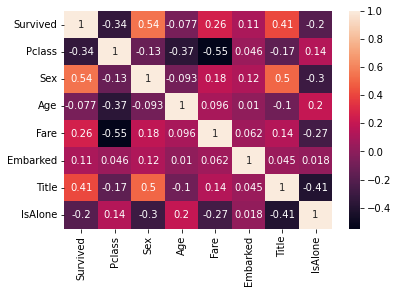

In [52]:
sns.heatmap(train_df.corr(),annot=True)

In [53]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,0,1,0
1,1,1,1,38.0,71.2833,1,3,0
2,1,3,1,26.0,7.9250,0,2,1
3,1,1,1,35.0,53.1000,0,3,0
4,0,3,0,35.0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,5,1
887,1,1,1,19.0,30.0000,0,2,1
888,0,3,1,NaN,23.4500,0,2,0
889,1,1,0,26.0,30.0000,1,1,1


In [54]:
test_df = test_df.drop(columns='Unnamed: 0')

In [55]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            42
Fare            1
Embarked        0
Title           0
IsAlone         0
dtype: int64

In [56]:
test_df.shape

(209, 8)

### Imputacion de datos faltantes 

* Que en este caso son Age y Embarked

In [57]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

columns_with_missing_values = test_df.columns[test_df.isnull().any()].tolist()

test_df_imputed = test_df.copy()

imputation_data = test_df[columns_with_missing_values].copy()

imputer = KNNImputer(n_neighbors=6)

imputed_data = imputer.fit_transform(imputation_data)

test_df_imputed[columns_with_missing_values] = imputed_data

In [58]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

columns_with_missing_values = train_df.columns[train_df.isnull().any()].tolist()

train_df_imputed = train_df.copy()

imputation_data = train_df[columns_with_missing_values].copy()

imputer = KNNImputer(n_neighbors=6)

imputed_data = imputer.fit_transform(imputation_data)

train_df_imputed[columns_with_missing_values] = imputed_data

In [59]:
X_train = train_df_imputed.drop("Survived", axis=1)
Y_train = train_df_imputed["Survived"]
X_test  = test_df_imputed.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (209, 7))

Transformacion de variables que previamente han sido transformadas de categoricas a numericas usando OneHot Encoder por lo que se transformaran en 2 variables cada una Sex_0 Sex_1

In [60]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()


transformed_features = encoder.fit_transform(X_train[["Sex", "IsAlone"]])


feature_names = encoder.get_feature_names_out (["Sex", "IsAlone"])


transformed_df = pd.DataFrame(transformed_features.toarray(), columns=feature_names)


X_train_encoded = pd.concat([X_train.drop(["Sex", "IsAlone"], axis=1), transformed_df], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()


transformed_features = encoder.fit_transform(X_test[["Sex", "IsAlone"]])


feature_names = encoder.get_feature_names_out (["Sex", "IsAlone"])


transformed_df = pd.DataFrame(transformed_features.toarray(), columns=feature_names)


X_test_encoded = pd.concat([X_test.drop(["Sex", "IsAlone"], axis=1), transformed_df], axis=1)

Exportamos los 2 datasets con todos los datos tratados

In [429]:
out_train_encoded = X_train_encoded
out_train_encoded.to_csv('train_encoded.csv', index=False)
print("Your encoded train data  was successfully saved!")

Your encoded train data  was successfully saved!


In [430]:
out_test_encoded = X_test_encoded
out_test_encoded.to_csv('test_encoded.csv', index=False)
print("Your encoded test data  was successfully saved!")

Your encoded test data  was successfully saved!


Utilizaremos el RFECV para la seleccion de mejores atributos para nuestros modelos: 
* RandomForestClassifier
* DecisionTreeClassifier
* LogisticRegression

In [75]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()

rfecv_rfc = RFECV(estimator=model, scoring='accuracy')

rfecv_rfc.fit(X_train_encoded, Y_train)

print('Optimal number of features: {}'.format(rfecv_rfc.n_features_))

selected_features_rfc = X_train_encoded.columns[rfecv_rfc.support_]
print('Selected features:')
print(selected_features_rfc)

Optimal number of features: 6
Selected features:
Index(['Pclass', 'Age', 'Fare', 'Title', 'Sex_0', 'Sex_1'], dtype='object')


### Vemos la importancia de cada variable del dataset imputado

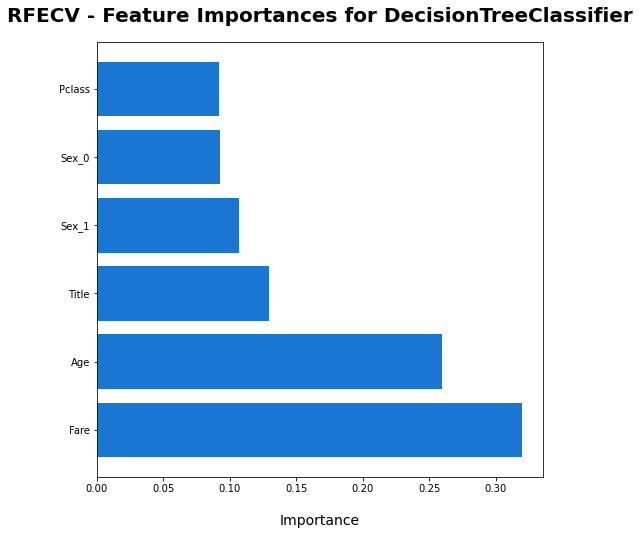

In [83]:
x = pd.DataFrame() 

x['attr'] = selected_features_rfc

x['importance'] = rfecv_rfc.estimator_.feature_importances_

x = x.sort_values(by='importance', ascending=False)
plt.figure(figsize=(8,8))
plt.barh(y=x['attr'], width=x['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances for DecisionTreeClassifier', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [76]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score


model = DecisionTreeClassifier()

rfecv_decst = RFECV(estimator=model, scoring='accuracy')

rfecv_decst.fit(X_train_encoded, Y_train)

print('Optimal number of features: {}'.format(rfecv_decst.n_features_))

selected_features_decst = X_train_encoded.columns[rfecv_decst.support_]
print('Selected features:')
print(selected_features_decst)


Optimal number of features: 2
Selected features:
Index(['Fare', 'Title'], dtype='object')


### Vemos la importancia de cada variable del dataset imputado

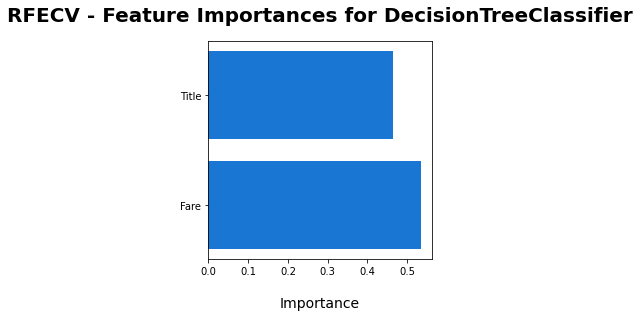

In [79]:
x = pd.DataFrame() 

x['attr'] = selected_features_decst

x['importance'] = rfecv_decst.estimator_.feature_importances_

x = x.sort_values(by='importance', ascending=False)
plt.figure(figsize=(4, 4))
plt.barh(y=x['attr'], width=x['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances for DecisionTreeClassifier', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [70]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score


model = LogisticRegression(C=1, penalty='l1', solver='liblinear')


rfecv = RFECV(estimator=model, scoring='neg_mean_squared_error')

X_selected = rfecv.fit(X_train_encoded, Y_train)

print('Optimal number of features: {}'.format(rfecv.n_features_))

selected_features = X_train_encoded.columns[rfecv.support_]
print("Selected features:")
print(selected_features)

Optimal number of features: 7
Selected features:
Index(['Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'Sex_1', 'IsAlone_1'], dtype='object')


### Vemos la importancia de cada variable del dataset imputado

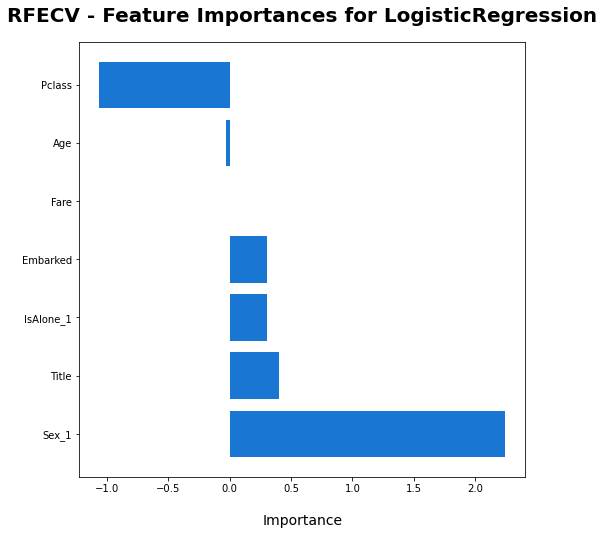

In [84]:
x = pd.DataFrame() 

x['attr'] = selected_features

x['importance'] = rfecv.estimator_.coef_[0]

x = x.sort_values(by='importance', ascending=False)
plt.figure(figsize=(8, 8))
plt.barh(y=x['attr'], width=x['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances for LogisticRegression', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [71]:
X_train_rfecv = X_train_encoded[['Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'Sex_1', 'IsAlone_1']]
X_test_rfecv = X_test_encoded[['Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'Sex_1', 'IsAlone_1']]

In [436]:
#from sklearn.model_selection import train_test_split
#X_trn, X_tst, y_trn, y_tst = train_test_split(X_train_rfecv, Y_train, test_size=0.2, random_state=42)

Dividiremos el dataset en train y test con un 80% 20%

In [87]:
from sklearn.model_selection import train_test_split
X_trn, X_tst, y_trn, y_tst = train_test_split(X_train_encoded, Y_train, test_size=0.2, random_state=42)

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_standar = sc.fit_transform(X)
X_TEST =  sc.transform(X_TEST)
"""

#### Usaremos un GridSearch para encontrar los valores optimos que nos darán una mayor precisión

In [438]:
from sklearn.model_selection import GridSearchCV
dtree = RandomForestClassifier()
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trn, y_trn)


best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor precisión:", best_accuracy)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mejor precisión: 0.8300699300699301


In [126]:
rfc = RandomForestClassifier(criterion='entropy',max_depth = 15, min_samples_leaf=2, min_samples_split=5)

rfc.fit(X_trn,y_trn)
predictions_rfc = rfc.predict(X_tst)

predictions_rfc.shape

(179,)

In [127]:
predictions_test_rfc = rfc.predict(X_test_encoded)
predictions_test_rfc.shape

(209,)

In [129]:
Forest_accuracy = accuracy_score(y_tst, predictions_rfc)
# Print the accuracy
print("Random Forest Accuracy:", Forest_accuracy)

Random Forest Accuracy: 0.8547486033519553


In [130]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions_test_rfc})
output.to_csv('rfc_1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [102]:
#Decision Tree

from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trn, y_trn)


best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor precisión:", best_accuracy)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor precisión: 0.8032896680784004


In [107]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 3)

tree.fit(X_trn,y_trn)
predictions_tree = tree.predict(X_tst)

predictions_tree.shape

(179,)

In [108]:
predictions_test_tree = tree.predict(X_test_encoded)
predictions_test_tree.shape

(209,)

In [109]:
Tree_accuracy = accuracy_score(y_tst, predictions_tree)
# Print the accuracy
print("Decision Tree Accuracy:", Tree_accuracy)

Decision Tree Accuracy: 0.8268156424581006


In [134]:
# Logistic Regression

logreg = LogisticRegression(C=9, penalty='l1', solver='liblinear')
logreg.fit(X_trn, y_trn)
Y_pred = logreg.predict(X_tst)

In [135]:
prd_test_logreg = logreg.predict(X_test_encoded)
prd_test_logreg.shape

(209,)

In [136]:
LogReg_accuracy = accuracy_score(y_tst, Y_pred)
# Print the accuracy
print("LogReg Accuracy:", LogReg_accuracy)

Decision Tree Accuracy: 0.7877094972067039


In [448]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': prd_test})
output.to_csv('log_reg6.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_trn, y_trn)
knn_predictions = knn.predict(X_tst)

In [146]:
prd_test_knn = knn.predict(X_test_encoded)
prd_test_knn.shape

(209,)

In [147]:
Knn_accuracy = accuracy_score(y_tst, knn_predictions)
# Print the accuracy
print("LogReg Accuracy:", Knn_accuracy)

LogReg Accuracy: 0.7206703910614525


In [150]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': prd_test_knn})
output.to_csv('knn.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### We compare the different model accuracy

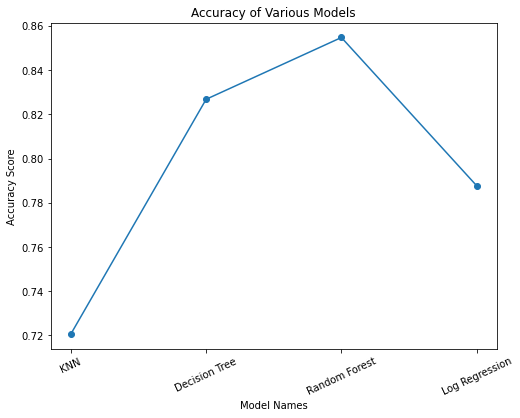

In [155]:
# Define the accuracy scores for each model
accuracy_scores = [Knn_accuracy, Tree_accuracy, Forest_accuracy,LogReg_accuracy]

# Define the model names
model_names = ['KNN', 'Decision Tree', 'Random Forest','Log Regression',]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), accuracy_scores, marker='o')
plt.xticks(range(1, 5), model_names, rotation=25)
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel('Accuracy Score')
plt.show()


## Visualización de la prediccion mediante una matriz de confusión

In [132]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_tst,predictions_rfc))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.84      0.80      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



In [156]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_tst,predictions_tree))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [137]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_tst,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [148]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_tst,knn_predictions))

              precision    recall  f1-score   support

           0       0.74      0.82      0.77       105
           1       0.69      0.58      0.63        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.72      0.72      0.72       179



#### Matriz de confusion de random forest

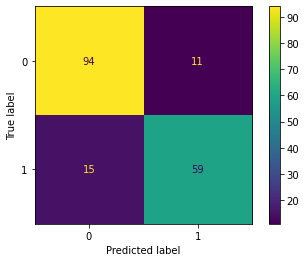

In [158]:
cm = confusion_matrix(y_tst, predictions_rfc, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

#### Matriz de confusion de arbol de decisiones

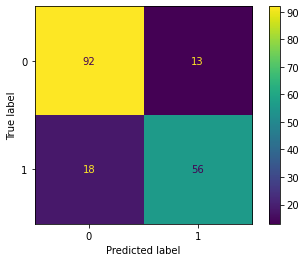

In [157]:
cm = confusion_matrix(y_tst, predictions_tree,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Matriz de confusion de regresión logistica

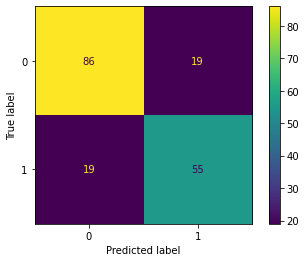

In [138]:
cm2 = confusion_matrix(y_tst, Y_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()

#### Matriz de confusion de knn

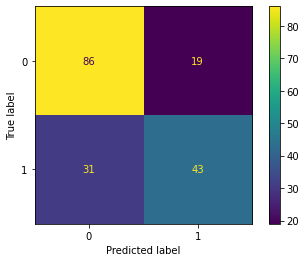

In [149]:
cm2 = confusion_matrix(y_tst, knn_predictions)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()